In [1]:
%run ../template.ipynb

In [2]:
exp_id = "052218"
series_names = ["mainstream", "maxsharing", "nosharing"]
num_apps_range = range(3, 4)
# num_apps_range = range(3, 5+1)

In [3]:
setups = {}
for num_apps in num_apps_range:
    setups.update(dataloaders.load_setups(exp_id))

Loading setups... Done (300 loaded)


In [4]:
rows = []
for series_name in series_names:
    schedules = dataloaders.load_schedules("052218", "stems_2." + series_name + ".sim.*.v1", variant='v1+correlation', setups=setups)
    rows += ex(schedules,
               each=lambda s: s.to_map({'correlation': s.extra('correlation')}),
               constant={'scheduler': 'stems_2', 'sharing': series_name})
df = comb(rows)

In [5]:
metrics = ["f1"]
for corr in set(df.correlation.values):
    for num_apps in set(df['num_apps'].values):
        df_view = df[(df['num_apps'] == num_apps) & (df['correlation'] == corr)]

        grouped = df_view.groupby(['sharing', 'budget'])

        series2 = agg2series(grouped['fps'].mean(),
                             names=series_names,
                             plotstyles=styles.SERIES_ALT,
                             plotparams='bg')

        for metric in metrics:
            series = agg2series(grouped[metric].mean(),
                                names=series_names,
                                plotparams='fg')

            ax = plot.variants(series,
                               xgrid=grids.x.budget,
                               ygrid=grids.y.get(metric))

            save('scheduler', exp_id, '{}-7hybrid-corr_{:g}-n{}'.format(metric, corr, num_apps))
            plt.close()

            ax1, ax2 = plot.variants_dual(series, series2,
                                          xgrid=grids.x.budget,
                                          ygrid=grids.y.get(metric),
                                          ygrid2=grids.y.fps)
            # legends.dual_fps(ax1, ax2, left=metric.capitalize())
            legends.hide(ax1, ax2)

            save('scheduler', exp_id, '{}-7hybrid-corr_{:g}-dual-n{}'.format(metric, corr, num_apps))
            plt.close()


/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/2018-Spring/plots/scheduler/052218/f1-7hybrid-corr_0-n3.pdf saved
/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/2018-Spring/plots/scheduler/052218/f1-7hybrid-corr_0-dual-n3.pdf saved
/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/2018-Spring/plots/scheduler/052218/f1-7hybrid-corr_0.5-n3.pdf saved
/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/2018-Spring/plots/scheduler/052218/f1-7hybrid-corr_0.5-dual-n3.pdf saved
/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/2018-Spring/plots/scheduler/052218/f1-7hybrid-corr_1-n3.pdf saved
/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/2018-Spring/plots/scheduler/052218/f1-7hybrid-corr_1-dual-n3.pdf saved


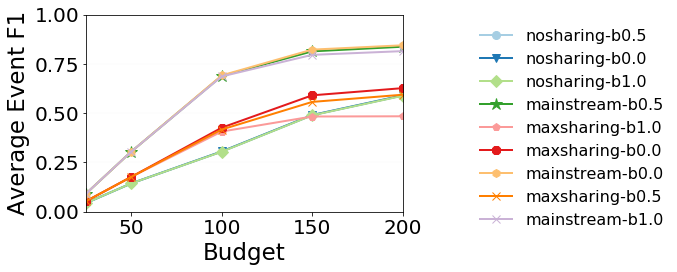

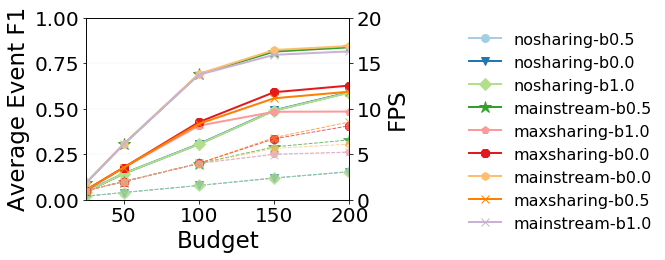

In [38]:
df['sharing_corr'] = df.apply(lambda r: str(r['sharing']) + '-b' + str(r['correlation']), axis=1)
grouped = df.groupby(['sharing_corr', 'budget'])
series_names = set(df['sharing_corr'].values)
plotstyles = []
series2 = agg2series(grouped['fps'].mean(),
                     names=series_names,
                     plotstyles=None,
                     plotparams='bg')

metric = "f1"
series = agg2series(grouped[metric].mean(),
                    names=series_names,
                    plotstyles=None,
                    plotparams='fg')

ax = plot.variants(series,
                   xgrid=grids.x.budget,
                   ygrid=grids.y.get(metric))
ax.legend(loc="upper left", bbox_to_anchor=(1.2,1))

# save('scheduler', exp_id, '{}-7hybrid-corr_{:g}-n{}'.format(metric, corr, num_apps))
# plt.close()

ax1, ax2 = plot.variants_dual(series, series2,
                              xgrid=grids.x.budget,
                              ygrid=grids.y.get(metric),
                              ygrid2=grids.y.fps)
# legends.dual_fps(ax1, ax2, left=metric.capitalize())
legends.hide(ax1, ax2)
ax1.legend(loc="upper left", bbox_to_anchor=(1.4,1))


# save('scheduler', exp_id, '{}-7hybrid-corr_{:g}-dual-n{}'.format(metric, corr, num_apps))
# plt.close()
